In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, log_loss

from sb_utils import save_file

In [2]:
cust_data = pd.read_csv('/Users/sweathanjasty/Desktop/Springboard/data/churners_cleaned.csv')

In [3]:
cust_data1 = cust_data.copy()

In [4]:
cust_data2 = cust_data1.copy()

In [5]:
#Select numerical and categorical

cust_data_num = cust_data1.select_dtypes(include=['int64', 'float64'])
cust_data_cat = cust_data1.select_dtypes(exclude=['int64', 'float64'])
cust_data_num = cust_data_num.iloc[:, 1:15]

In [6]:
##One Hot encoding of Categorical Variables

# define data
data = asarray([['Attrition_Flag'], ['Gender'], ['Education_Level'], ['Marital_Status'], ['Education_Level'], ['Income_Category'], ['Card_Category']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['Attrition_Flag']
 ['Gender']
 ['Education_Level']
 ['Marital_Status']
 ['Education_Level']
 ['Income_Category']
 ['Card_Category']]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [7]:
cust_data1 = cust_data.copy()
cust_data1.drop(columns='CLIENTNUM', inplace=True)

In [8]:
cust_data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Text(0.5, 1.0, 'Count values to target variable')

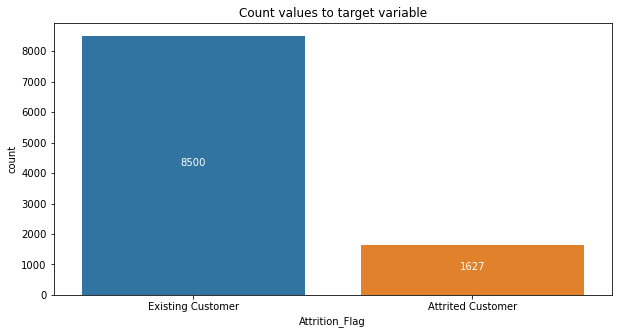

In [9]:
plt.figure(figsize=(10,5))
g= sns.countplot(x='Attrition_Flag', data=cust_data1);
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')
plt.title('Count values to target variable')

In [10]:
##MULTIVARIATE ANALYSIS

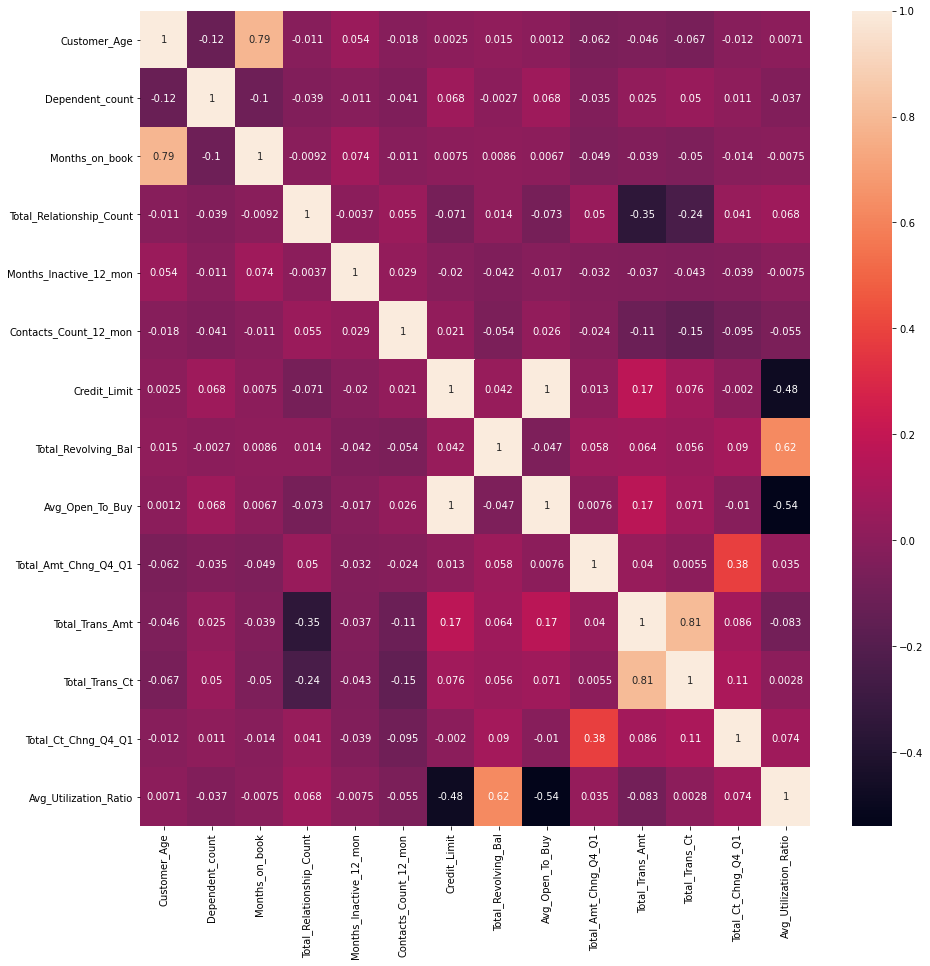

In [11]:
##Pearson's coefficient ranges from -1 to 1. So:

##r = 1 It means a perfect and positive correlation between the two variables.

##A negative and perfect correlation between the two variables – that is, if one increases, the other always decreases returns an r = -1.

##r = 0 It means that the two variables do not depend linearly on each other. However, there may be another dependency that is "non-linear". Thus, the result r = 0 must be investigated by other means.

correlations = cust_data1.corr(method='pearson')
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True);

In [12]:
cust_data_cat.sample()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
785,Attrited Customer,M,Doctorate,Single,$60K - $80K,Blue


In [13]:
cust_data_cat_dummies = pd.get_dummies(cust_data_cat)

In [14]:
#Need to remove Attrition flag
cust_data_cat_dummies.head()

,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [15]:
cust_data3 = pd.concat([cust_data_num, cust_data_cat_dummies], axis=1)

In [16]:
X = cust_data3.copy()
y = cust_data2['Attrition_Flag']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)